In [34]:
import pandas as pd
from long_lat_multifamily_la2 import longitude_latitude_dict

In [35]:
# # Check the structure of longitude_latitude_dict
# print("Sample entry from longitude_latitude_dict:")
# sample_key = next(iter(longitude_latitude_dict))
# print(f"Key: {sample_key}")
# print(f"Value: {longitude_latitude_dict[sample_key]}")

# # Filter out entries where either longitude or latitude is None
# filtered_longitude_latitude_dict = {}
# for location, coords in longitude_latitude_dict.items():
#     # Check if coords is a list with two elements and neither is None
#     if isinstance(coords, list) and len(coords) == 2 and coords[0] is not None and coords[1] is not None:
#         filtered_longitude_latitude_dict[location] = coords

# # Print statistics about the filtering
# print(f"Original dictionary size: {len(longitude_latitude_dict)}")
# print(f"Filtered dictionary size: {len(filtered_longitude_latitude_dict)}")
# print(f"Removed {len(longitude_latitude_dict) - len(filtered_longitude_latitude_dict)} entries with None values")

# # Replace the original dictionary with the filtered one
# longitude_latitude_dict = filtered_longitude_latitude_dict

# len(longitude_latitude_dict)

                               project  \
0     af1c9174_11418-w-missouri-avenue   
1    a980d8c5_11801-mississippi-avenue   
2  27824e27_1408-w-jefferson-boulevard   
3                faf5804c_landmark-two   
4      3b4a60eb_ac-hotel-beverly-hills   

                                            location              status  \
0     11418 Missouri Avenue    Los Angeles, CA 90025  Under construction   
1  11801 Mississippi Avenue    Los Angeles, CA 90025           Completed   
2  1408 West Jefferson Boulevard    Los Angeles, ...            Proposed   
3       11750 Wilshire Blvd    Los Angeles, CA 90025           Completed   
4        6399 Wilshire Blvd    Los Angeles, CA 90048           Completed   

  earliest_date  
0    2025-01-27  
1    2017-05-15  
2    2024-01-12  
3    2013-12-05  
4    2016-11-21  

Status counts:
status
Proposed              1865
Completed              857
Under construction     807
Approved               227
Name: count, dtype: int64


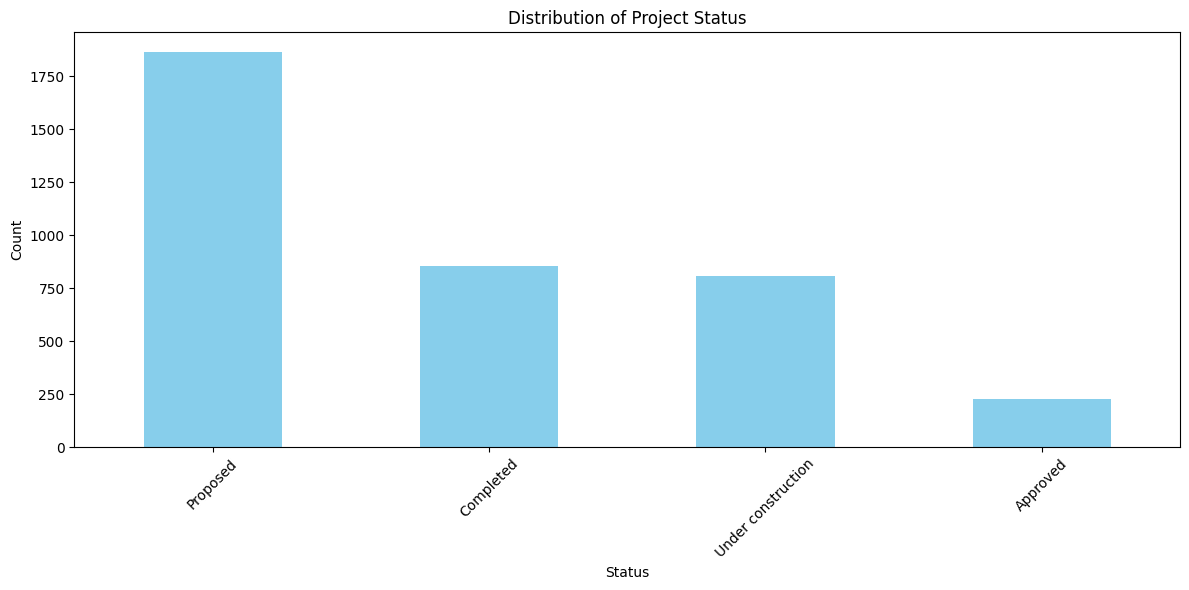


Status percentage:
Proposed: 49.7%
Completed: 22.8%
Under construction: 21.5%
Approved: 6.0%
Number of projects not in longitude_latitude_dict: 1087

Status counts for projects not in longitude_latitude_dict:
status
Proposed              480
Completed             328
Under construction    216
Approved               52
Name: count, dtype: int64


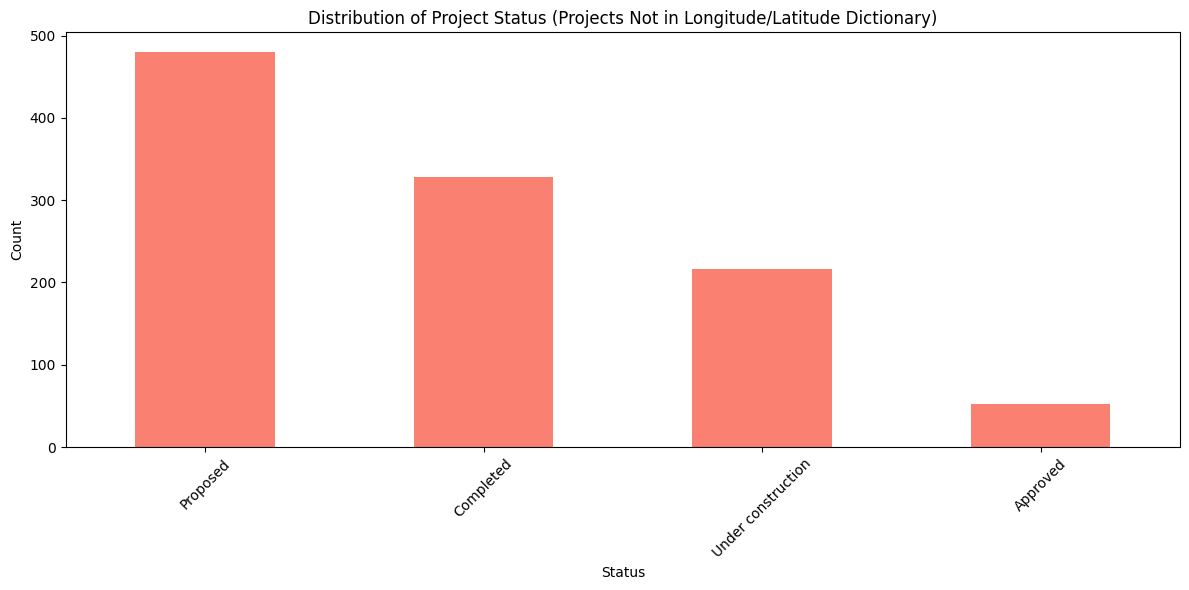


Status percentage for projects not in longitude_latitude_dict:
Proposed: 44.6%
Completed: 30.5%
Under construction: 20.1%
Approved: 4.8%


In [36]:
project_dates = pd.read_csv('project_dates.csv')
# Display the first few rows to understand the data
print(project_dates.head())

# Check if 'status' column exists
if 'status' in project_dates.columns:
    # Count the occurrences of each status
    status_counts = project_dates['status'].value_counts()
    
    # Display the counts
    print("\nStatus counts:")
    print(status_counts)
    
    # Create a bar chart to visualize the status distribution
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    status_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Project Status')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate percentage of each status
    status_percentage = (status_counts / status_counts.sum() * 100).round(1)
    print("\nStatus percentage:")
    for status, percentage in status_percentage.items():
        print(f"{status}: {percentage}%")
else:
    print("The 'status' column does not exist in the dataframe.")


# Find projects that are not in the longitude_latitude_dict
projects_not_in_dict = project_dates[~project_dates['location'].isin(longitude_latitude_dict.keys())]

print(f"Number of projects not in longitude_latitude_dict: {len(projects_not_in_dict)}")

# Check if 'status' column exists in the filtered dataframe
if 'status' in projects_not_in_dict.columns:
    # Count the occurrences of each status for projects not in the dictionary
    status_counts_not_in_dict = projects_not_in_dict['status'].value_counts()
    
    # Display the counts
    print("\nStatus counts for projects not in longitude_latitude_dict:")
    print(status_counts_not_in_dict)
    
    # Create a bar chart to visualize the status distribution
    plt.figure(figsize=(12, 6))
    status_counts_not_in_dict.plot(kind='bar', color='salmon')
    plt.title('Distribution of Project Status (Projects Not in Longitude/Latitude Dictionary)')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate percentage of each status
    status_percentage_not_in_dict = (status_counts_not_in_dict / status_counts_not_in_dict.sum() * 100).round(1)
    print("\nStatus percentage for projects not in longitude_latitude_dict:")
    for status, percentage in status_percentage_not_in_dict.items():
        print(f"{status}: {percentage}%")
else:
    print("The 'status' column does not exist in the filtered dataframe.")


In [37]:


# Read in the project_dates.csv file
project_dates = pd.read_csv('project_dates.csv')

# Display the first few rows to verify the data was loaded correctly
print("Project dates dataframe loaded with shape:", project_dates.shape)
project_dates.head()

# Filter to keep only projects where location is already in the longitude_latitude_dict
filtered_projects = project_dates[project_dates['location'].isin(longitude_latitude_dict.keys())]

# Display the number of projects kept
print(f"Total projects: {len(project_dates)}")
print(f"Projects with location already in dictionary: {len(filtered_projects)}")
print(f"Projects not in dictionary (filtered out): {len(project_dates) - len(filtered_projects)}")

# Update the project_dates dataframe to only include projects in the dictionary
project_dates = filtered_projects.reset_index(drop=True)


Project dates dataframe loaded with shape: (3803, 4)
Total projects: 3803
Projects with location already in dictionary: 2716
Projects not in dictionary (filtered out): 1087


In [38]:
project_dates

,project,location,status,earliest_date
0,af1c9174_11418-w-missouri-avenue,"11418 Missouri Avenue Los Angeles, CA 90025",Under construction,2025-01-27
1,27824e27_1408-w-jefferson-boulevard,"1408 West Jefferson Boulevard Los Angeles, ...",Proposed,2024-01-12
2,faf5804c_landmark-two,"11750 Wilshire Blvd Los Angeles, CA 90025",Completed,2013-12-05
3,c8edeef6_520-534-n-glendale-ave,"520 North Glendale Avenue Glendale, CA 91206",Proposed,2022-04-12
4,d7e88265_1414-n-las-palmas-avenue,"1414 N Las Palmas Avenue Los Angeles, CA 90028",Proposed,2020-04-11
...,...,...,...,...
2711,710daebb_937-pine-ave,"937 Pine Avenue Long Beach, CA 90813",Proposed,2022-10-20
2712,b922b678_10505-washington-boulevard,"10505 Washington Boulevard Culver City, CA ...",Proposed,2023-06-15
2713,f064f9ad_3647-hughes-avenue,"3647 Hughes Avenue Los Angeles, CA 90034",Proposed,2016-11-08
2714,29145332_ambrose-apartments-1615-montana,"1615 Montana Street Los Angeles, CA 90026",Completed,2019-03-14


In [39]:
# Check for duplicate locations in the project_dates dataframe
duplicate_locations = project_dates['location'].duplicated(keep=False)
print(f"Number of duplicate locations: {duplicate_locations.sum()}")

if duplicate_locations.sum() > 0:
    # Display the duplicate locations
    print("\nDuplicate locations found:")
    duplicate_df = project_dates[duplicate_locations].sort_values('location')
    display(duplicate_df)
    
    # Remove all duplicates (both first and subsequent occurrences)
    project_dates = project_dates[~duplicate_locations].reset_index(drop=True)
    print(f"\nAfter removing all duplicates, dataframe shape: {project_dates.shape}")

# Verify no duplicates remain
assert project_dates['location'].duplicated().sum() == 0, "Duplicates still exist in the dataframe"
print("Successfully removed all duplicate locations.")


Number of duplicate locations: 67

Duplicate locations found:


,project,location,status,earliest_date
1233,d138f28a_affordable-student-housing-phase-4-an...,"1000 E. Victoria Street Carson, CA 90747",Proposed,2023-06-05
2107,0a2138d3_csu-dominguez-hills-science-innovatio...,"1000 E. Victoria Street Carson, CA 90747",Completed,2017-10-03
34,78ea12ad_west-la-va-building-402,"11301 Wilshire Boulevard Los Angeles, CA 90073",Proposed,2022-11-02
928,fd6bc2e3_north-va-campus-building-402,"11301 Wilshire Boulevard Los Angeles, CA 90073",Proposed,2023-07-05
1520,84a8623a_west-la-va-building-404,"11301 Wilshire Boulevard Los Angeles, CA 90073",Under construction,2023-02-14
...,...,...,...,...
1365,4857d7e5_959-e-stadium-way,"959 Stadium Way Los Angeles, CA 90012",Proposed,2023-03-15
2710,c2107d40_stadium-villas,"959 Stadium Way Los Angeles, CA 90012",Proposed,2018-07-03
600,309d53cf_6500-sepulveda-boulevard,"N Sepulveda Blvd Los Angeles, CA 90049",Under construction,2016-11-17
1221,6a5cd97e_mission-gateway,"N Sepulveda Blvd Los Angeles, CA 90049",Under construction,2016-08-03



After removing all duplicates, dataframe shape: (2649, 4)
Successfully removed all duplicate locations.


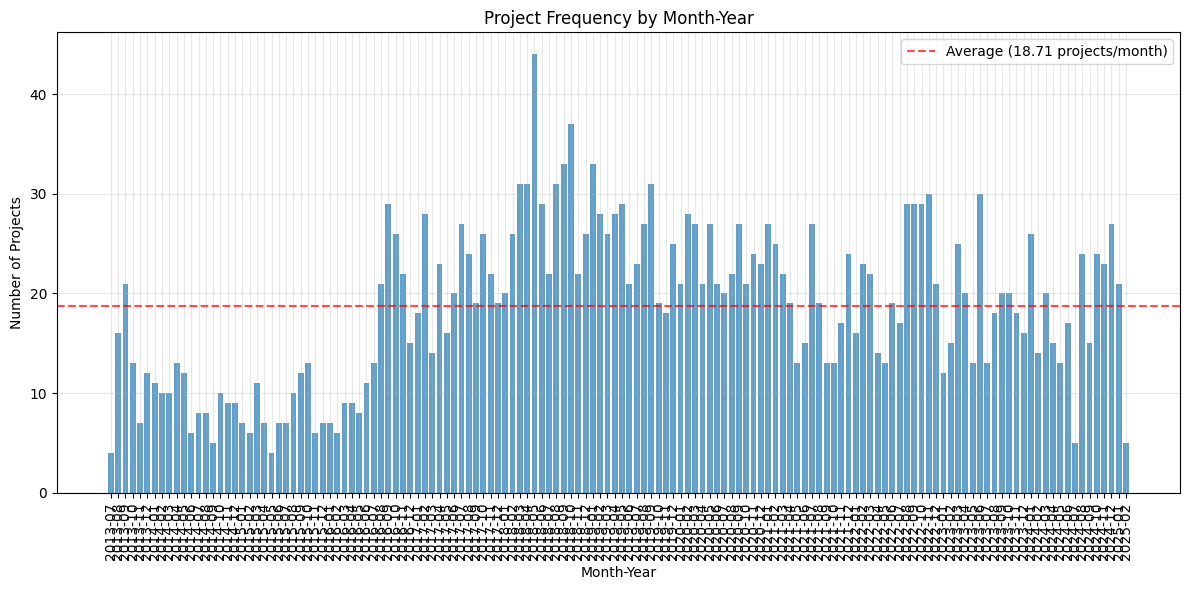

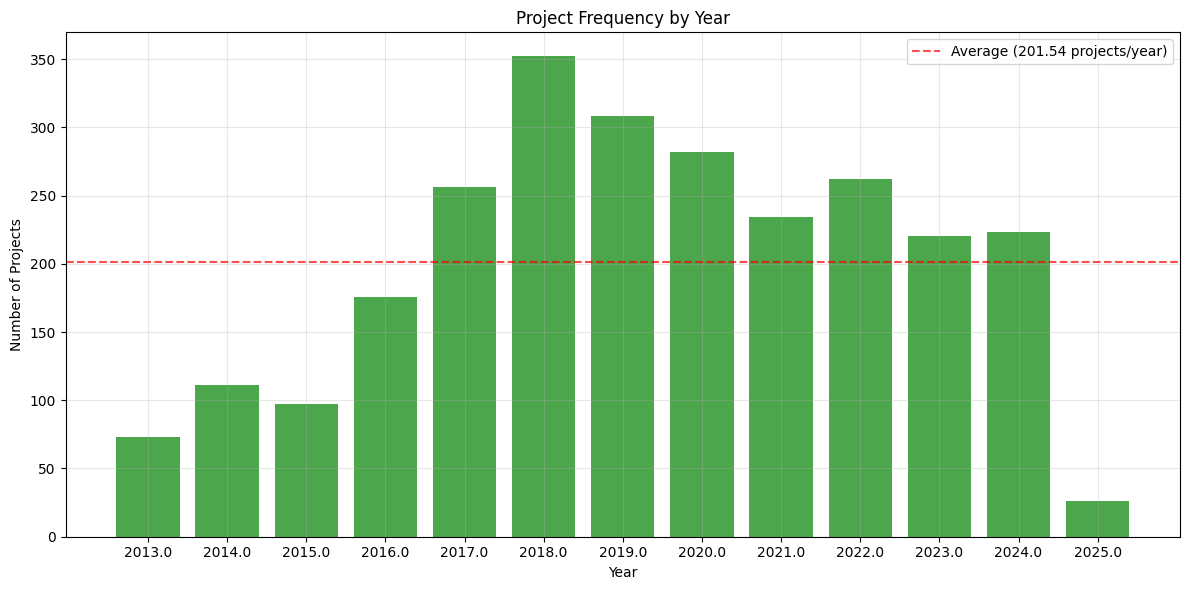

,project,location,status,earliest_date,month_year,year
0,af1c9174_11418-w-missouri-avenue,"11418 Missouri Avenue Los Angeles, CA 90025",Under construction,2025-01-27,2025-01,2025.0
1,27824e27_1408-w-jefferson-boulevard,"1408 West Jefferson Boulevard Los Angeles, ...",Proposed,2024-01-12,2024-01,2024.0
2,faf5804c_landmark-two,"11750 Wilshire Blvd Los Angeles, CA 90025",Completed,2013-12-05,2013-12,2013.0
3,c8edeef6_520-534-n-glendale-ave,"520 North Glendale Avenue Glendale, CA 91206",Proposed,2022-04-12,2022-04,2022.0
4,d7e88265_1414-n-las-palmas-avenue,"1414 N Las Palmas Avenue Los Angeles, CA 90028",Proposed,2020-04-11,2020-04,2020.0
...,...,...,...,...,...,...
2644,710daebb_937-pine-ave,"937 Pine Avenue Long Beach, CA 90813",Proposed,2022-10-20,2022-10,2022.0
2645,b922b678_10505-washington-boulevard,"10505 Washington Boulevard Culver City, CA ...",Proposed,2023-06-15,2023-06,2023.0
2646,f064f9ad_3647-hughes-avenue,"3647 Hughes Avenue Los Angeles, CA 90034",Proposed,2016-11-08,2016-11,2016.0
2647,29145332_ambrose-apartments-1615-montana,"1615 Montana Street Los Angeles, CA 90026",Completed,2019-03-14,2019-03,2019.0


In [40]:
import matplotlib.pyplot as plt

# Convert earliest_date to datetime format
project_dates['earliest_date'] = pd.to_datetime(project_dates['earliest_date'])

# Extract month and year from earliest_date
project_dates['month_year'] = project_dates['earliest_date'].dt.to_period('M')

# Count the frequency of each month-year
date_counts = project_dates['month_year'].value_counts().sort_index()

# Create a bar plot of the frequency by month-year
plt.figure(figsize=(12, 6))
plt.bar(date_counts.index.astype(str), date_counts.values, alpha=0.7)
plt.title('Project Frequency by Month-Year')
plt.ylabel('Number of Projects')
plt.xlabel('Month-Year')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

# Add a reference line for the average
avg_projects = date_counts.mean()
plt.axhline(y=avg_projects, color='r', linestyle='--', alpha=0.7, 
            label=f'Average ({avg_projects:.2f} projects/month)')
plt.legend()

plt.tight_layout()
plt.show()

# Also create a plot by year
# Extract year from earliest_date
project_dates['year'] = project_dates['earliest_date'].dt.year

# Count the frequency of each year
year_counts = project_dates['year'].value_counts().sort_index()

# Create a bar plot of the frequency by year
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, alpha=0.7, color='green')
plt.title('Project Frequency by Year')
plt.ylabel('Number of Projects')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)

# Add a reference line for the average
avg_projects_per_year = year_counts.mean()
plt.axhline(y=avg_projects_per_year, color='r', linestyle='--', alpha=0.7, 
            label=f'Average ({avg_projects_per_year:.2f} projects/year)')
plt.legend()

plt.tight_layout()
plt.show()

# Display the dataframe as well
project_dates

In [41]:
# Filter projects from 2014 to 2020 (inclusive)
filtered_projects = project_dates[(project_dates['year'] >= 2014) & (project_dates['year'] <= 2021)]

# Further filter projects to only include those with status 'Under construction' or 'Completed'
filtered_projects = filtered_projects[
    filtered_projects['status'].str.lower().isin(['under construction', 'completed', 'approved'])
]


# Display the count of filtered projects
print(f"Number of projects from 2014 to 2020: {len(filtered_projects)}")


# Export the filtered projects to a CSV file
filtered_projects.to_csv('filtered_projects_2014_2021.csv', index=False)
print(f"Filtered projects exported to 'filtered_projects_2014_2021.csv'")


# Display the filtered dataframe
filtered_projects


Number of projects from 2014 to 2020: 1022
Filtered projects exported to 'filtered_projects_2014_2021.csv'


,project,location,status,earliest_date,month_year,year
8,f98fc467_1600-1616-e-florence-avenue,"1600 Florence Ave Los Angeles, CA 90001",Under construction,2016-10-14,2016-10,2016.0
10,a89d0157_1043-1049-s-harvard-boulevard,"1043 S Harvard Blvd Los Angeles, CA 90006",Under construction,2020-02-05,2020-02,2020.0
15,389bc14c_4804-oakwood-avenue,"4804 Oakwood Ave Los Angeles, CA 90004",Under construction,2019-01-31,2019-01,2019.0
18,b7a0d5b3_7617-santa-monica,"7617 Santa Monica Blvd West Hollywood, CA 9...",Under construction,2018-07-27,2018-07,2018.0
19,942f9c21_the-residences-on-jamboree-2801-kelvin,"2801 Kelvin Avenue Irvine, CA 92614",Completed,2016-03-31,2016-03,2016.0
...,...,...,...,...,...,...
2633,3b9e3e30_14540-erwin-street,"14540 Erwin St Los Angeles, CA 91411",Under construction,2019-10-24,2019-10,2019.0
2636,e2e38561_425-palm-drive,"425 N Palm Dr Beverly Hills, CA 90210",Under construction,2019-07-19,2019-07,2019.0
2641,e374e0f1_blossom-plaza-900-n-broadway,"900 North Broadway Los Angeles, CA 90012",Completed,2014-02-10,2014-02,2014.0
2642,f2e13a5e_metamorphosis-on-foothill,"13574 Foothill Blvd Los Angeles, CA 91342",Under construction,2019-10-16,2019-10,2019.0
